**Description**: This dataset contains customer ratings and feedback for various restaurants, along with demographic information about the customers. It includes columns such as:

Customer ID: A unique identifier for each customer. Restaurant ID: A unique identifier for each restaurant. Cuisine: The type of cuisine offered by the restaurant (e.g., Italian, Chinese, Indian). Rating: The customer's rating of the restaurant (on a scale of 1 to 5). Review: The customer's written review of the restaurant. Demographic Information: Includes data such as age, gender, location, marital status, and profession.

**Context**: This dataset can be used for various purposes, including:

Restaurant recommendation systems: Developing systems that suggest restaurants to customers based on their preferences and past behavior. Market research: Analyzing customer preferences, identifying popular cuisines, and understanding demographic trends. Sentiment analysis: Analyzing customer reviews to gauge public opinion about different restaurants and cuisines. Predictive modeling: Building models to predict restaurant ratings or customer satisfaction based on various factors.

***EDA Description Exploratory Data Analysis (EDA) for Restaurant Cuisine Ratings Data***

The goal of EDA for this dataset is to gain a deeper understanding of the data, identify patterns, and uncover potential insights.

Some key areas to explore include:

Distribution of ratings: Analyze the distribution of ratings to understand the overall satisfaction level of customers.
Relationship between cuisine and ratings: Investigate if there are any differences in ratings across different cuisines.
Customer demographics: Analyze the demographic characteristics of customers and their impact on ratings.
Sentiment analysis of reviews: Extract key themes and sentiments from customer reviews to understand their opinions and experiences.
Visualization: Use visualizations (e.g., histograms, bar charts, scatter plots) to explore the data and identify relationships between variables.

**Potential EDA Questions**:

1. What is the average rating for each cuisine?

2. Are there any significant differences in ratings between male and female customers?

3. How does the age of customers correlate with their ratings?

4. What are the most common themes and sentiments expressed in customer reviews?

5. Are there any geographic patterns in restaurant ratings?

6. By conducting a thorough EDA, you can uncover valuable insights about customer preferences, restaurant performance, and potential areas for improvement.

**User ID**: User ID of customers\
**Area Code**: Area code of customers residence\
**Location**: Area and the city of residence of customers\
**Gender**: Gender of customer\
**YOB**: Year when customer was born\
**Marital status**:  Marital status of customer\
**Activity**: Customers career status whether student or professional\
**Budget**: Budget they may spend in the restaurant\
**Cuisines**: Cuisine they preferred/liked the most to have at restaurant\
**Alcohol**: Alcohol intake frequency\
**Smoker**: Smoking frequency\
**Food Rating**: Rating they gave to restaurant's food\
**Service Rating**: Rating they gave to restaurant's service\
**Overall Rating**: Mean rating calculated from food and service ratings\
**Often A S**: Often they visited restaurant or not\

In [49]:
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [50]:
# Load the dataset
df = pd.read_csv('Cuisine_rating.csv')
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [51]:
df.shape

(200, 15)

In [52]:
df.isnull().sum()

User ID           0
Area code         0
Location          0
Gender            0
YOB               0
Marital Status    0
Activity          0
Budget            0
Cuisines          0
Alcohol           0
Smoker            0
Food Rating       0
Service Rating    0
Overall Rating    0
Often A S         0
dtype: int64

In [53]:
df['Gender'].value_counts()

Gender
Male      118
Female     82
Name: count, dtype: int64

In [54]:
df['Activity'].value_counts() /200 *100

Activity
Student         60.0
Professional    40.0
Name: count, dtype: float64

In [55]:
df.groupby('Gender', as_index=False)['Activity'].value_counts()

,Gender,Activity,count
0,Female,Student,42
1,Female,Professional,40
2,Male,Student,78
3,Male,Professional,40


In [56]:
gen_activity = df.groupby('Gender', as_index=False)['Activity'].value_counts()

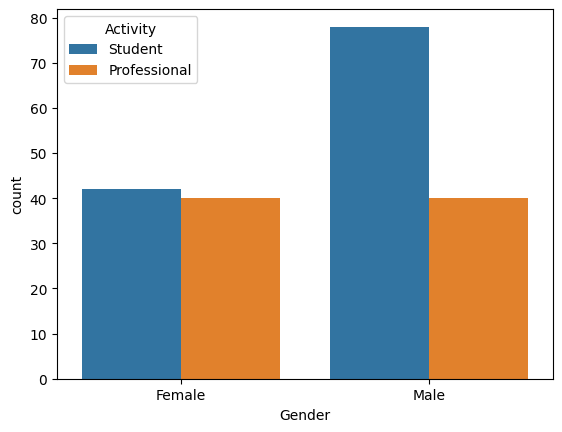

In [57]:
sns.barplot(gen_activity, x='Gender', y='count', hue='Activity')
plt.show()

In [58]:
df['Budget'].unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [59]:
gen_marstts = df.groupby('Gender', as_index=False)['Marital Status'].value_counts()
gen_marstts

,Gender,Marital Status,count
0,Female,Single,40
1,Female,Married,36
2,Female,Divorced,6
3,Male,Single,60
4,Male,Married,50
5,Male,Divorced,8


In [60]:
# Gender Married Ratio
df.groupby('Gender')['Marital Status'].value_counts() /200 *100

Gender  Marital Status
Female  Single            20.0
        Married           18.0
        Divorced           3.0
Male    Single            30.0
        Married           25.0
        Divorced           4.0
Name: count, dtype: float64

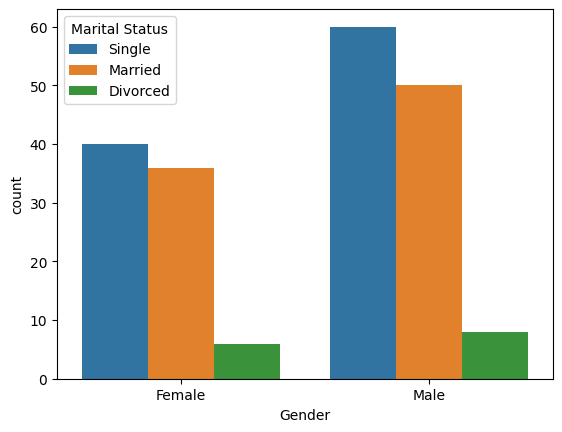

In [61]:
# Plotting
sns.barplot(gen_marstts, x='Gender', y='count', hue='Marital Status')
plt.show()

In [62]:
# unique values in Cuisines
df['Cuisines'].unique()

array(['Japanese', 'Indian', 'Seafood', 'Filipino', 'Italian', 'Chinese',
       'French'], dtype=object)

In [63]:
#food eaten by customers 
df.groupby('Gender', as_index=False)['Cuisines'].value_counts()

,Gender,Cuisines,count
0,Female,French,16
1,Female,Chinese,14
2,Female,Japanese,14
3,Female,Filipino,12
4,Female,Italian,12
5,Female,Indian,10
6,Female,Seafood,4
7,Male,Filipino,22
8,Male,Indian,22
9,Male,Japanese,22


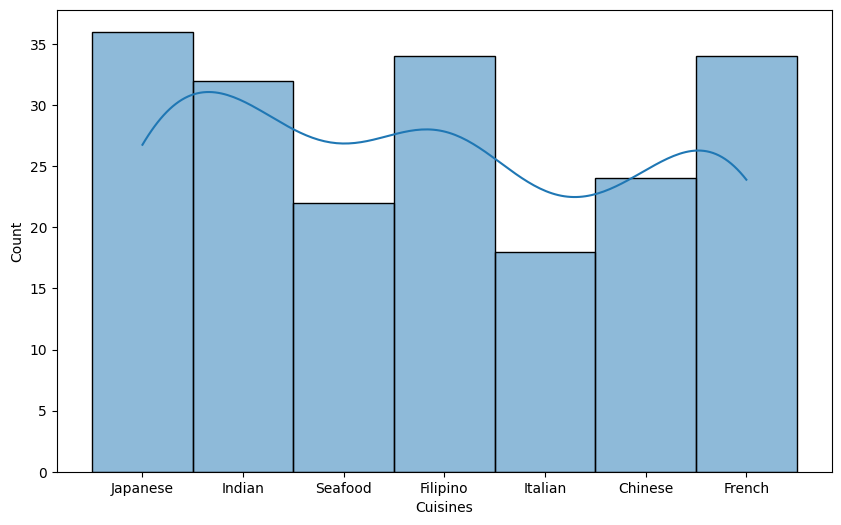

In [64]:
# Behaviour of cuisines w.r.t customers
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Cuisines', kde=True, bins=50)
plt.show()

In [ ]:
# Number of unique values in 'Alcohol '
df['Alcohol '].unique()

array(['Never', 'Often', 'Socially'], dtype=object)

In [ ]:
#How many customers are alcoholic
gen_alcohol = df.groupby('Gender', as_index=False)['Alcohol '].value_counts()
gen_alcohol

,Gender,Alcohol,count
0,Female,Never,40
1,Female,Often,25
2,Female,Socially,17
3,Male,Never,48
4,Male,Often,36
5,Male,Socially,34


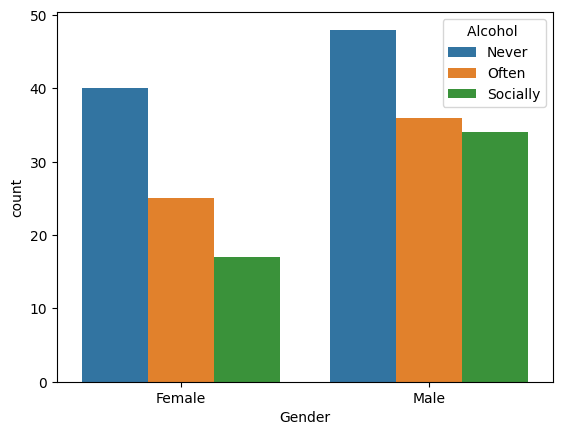

In [ ]:
#Plot
sns.barplot(gen_alcohol, x='Gender', y='count', hue='Alcohol ')
plt.show()

In [73]:
df.groupby('Gender', as_index=False)['Food Rating'].value_counts()

,Gender,Food Rating,count
0,Female,5,27
1,Female,1,17
2,Female,3,15
3,Female,4,15
4,Female,2,8
5,Male,3,31
6,Male,2,27
7,Male,5,26
8,Male,4,20
9,Male,1,14


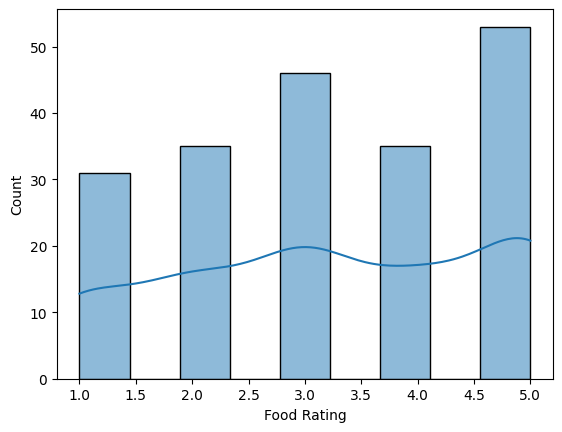

In [74]:
sns.histplot(df, x='Food Rating', kde=True)
plt.show()

In [79]:
df.groupby(['Gender', 'Cuisines'], as_index=False)['Food Rating'].value_counts()

,Gender,Cuisines,Food Rating,count
0,Female,Chinese,3,6
1,Female,Chinese,5,4
2,Female,Chinese,1,2
3,Female,Chinese,4,2
4,Female,Filipino,5,5
5,Female,Filipino,1,4
6,Female,Filipino,3,2
7,Female,Filipino,4,1
8,Female,French,3,4
9,Female,French,4,4


In [80]:
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [81]:
df.groupby('Gender', as_index=False)['Service Rating'].value_counts()

,Gender,Service Rating,count
0,Female,5,29
1,Female,2,17
2,Female,1,13
3,Female,4,13
4,Female,3,10
5,Male,5,37
6,Male,2,26
7,Male,1,22
8,Male,3,19
9,Male,4,14


In [82]:
df.groupby('Food Rating', as_index=False)['Service Rating'].value_counts()

,Food Rating,Service Rating,count
0,1,5,11
1,1,2,8
2,1,1,6
3,1,4,5
4,1,3,1
5,2,5,16
6,2,3,7
7,2,2,5
8,2,4,4
9,2,1,3


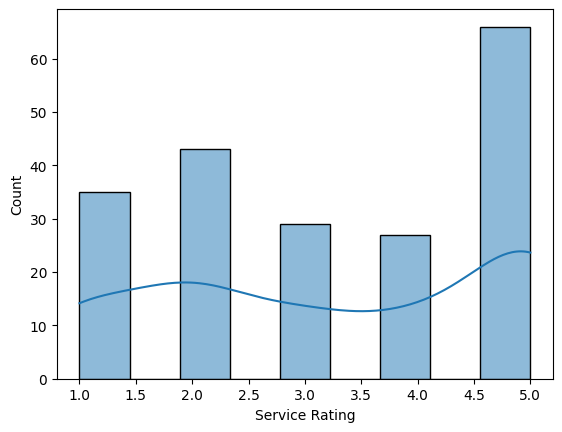

In [84]:
sns.histplot(df, x='Service Rating', kde=True)
plt.show()

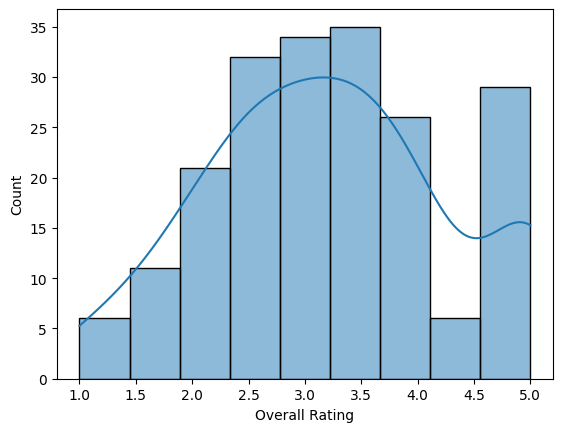

In [85]:
sns.histplot(df, x='Overall Rating', kde=True)
plt.show()

In [86]:
df.groupby('Gender', as_index=False)['Often A S'].value_counts()

,Gender,Often A S,count
0,Female,No,72
1,Female,Yes,10
2,Male,No,102
3,Male,Yes,16


In [87]:
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


### What is the average rating of each Cuisine?

In [88]:
df.groupby('Cuisines', as_index=False)['Overall Rating'].mean()

,Cuisines,Overall Rating
0,Chinese,3.270833
1,Filipino,3.044118
2,French,3.102941
3,Indian,3.171875
4,Italian,3.194444
5,Japanese,3.597222
6,Seafood,3.136364


### Are there any significant differences in ratings between male and female customers?

In [90]:
df.groupby('Gender', as_index=False)['Overall Rating'].mean()

,Gender,Overall Rating
0,Female,3.335366
1,Male,3.148305


> There isn't any significant difference.

### How does the age of customers correlate with their ratings?

In [94]:
df['YOB'].unique()

array([2006, 1991, 1977, 1956, 1997, 1995, 2003, 1965, 1975, 1963, 1980,
       2007, 2004, 2001, 1959, 2009, 1983, 1971, 1974, 1969, 2000, 1988,
       1999, 1998, 1990, 1987, 1986, 1967, 1985, 1976, 2005, 1989, 1958,
       1981, 1962, 1964, 1955, 2002, 1996, 1961, 1957, 1994, 1979, 1978,
       1960, 1982], dtype=int64)

In [112]:
YOB_OR = df.groupby('YOB', as_index=False)['Overall Rating'].mean()
YOB_OR

,YOB,Overall Rating
0,1955,3.750000
1,1956,2.000000
2,1957,4.000000
3,1958,4.000000
4,1959,2.000000
5,1960,3.500000
6,1961,3.000000
7,1962,2.250000
8,1963,2.875000
9,1964,3.500000


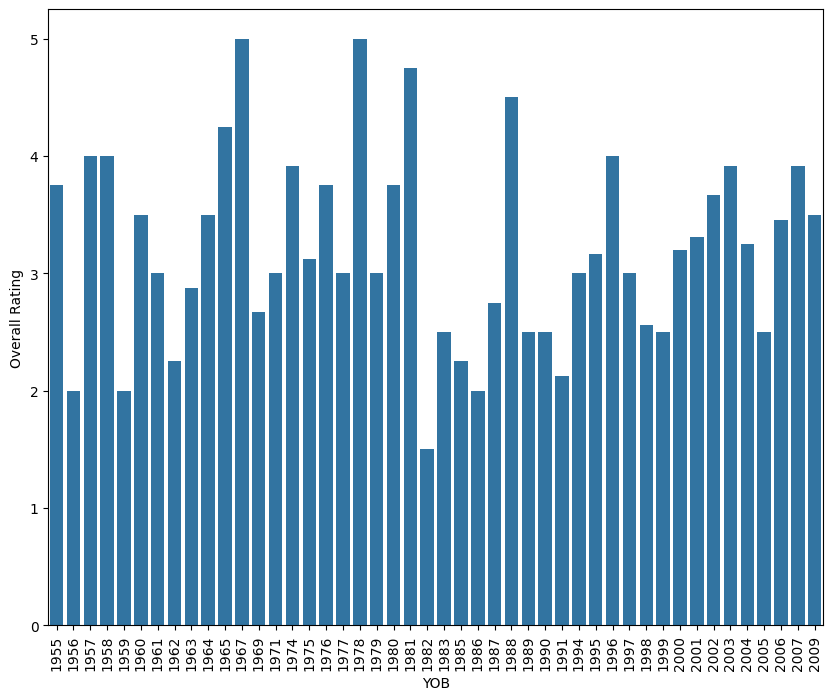

In [116]:
plt.figure(figsize=(10,8))
sns.barplot(YOB_OR, x='YOB', y='Overall Rating' )
plt.xticks(rotation=90)
plt.show()

### Are there any geographic patterns in restaurant ratings?

In [117]:
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [120]:
df.groupby('Location')['Overall Rating'].mean().sort_values(ascending=False)

Location
Market City, NY       3.725000
Central Park,ny       3.687500
Cedar Hill, NY        3.500000
Central Park,NY       3.437500
China Town, NY        3.159091
Upper West Side,NY    3.138889
St. George,NY         3.119565
Riverdale,NY          3.053571
Upper East Side,NY    3.016667
Market City, MY       3.000000
Name: Overall Rating, dtype: float64